In [2]:
import pandas as pd
from sklearn.cluster import KMeans  
from collections import Counter
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA,FastICA
import matplotlib.pyplot as plt


In [3]:
data=pd.read_excel('E:\Machine Learning\HW3\Cars.xlsx')

In [4]:
data.head()

,Buy,Maintain,Doors,Persons,lug_boot,Safety,Values,Acc or Not
0,4,4,2,2,1,1,0,0
1,4,4,2,2,1,2,0,0
2,4,4,2,2,1,3,0,0
3,4,4,2,2,2,1,0,0
4,4,4,2,2,2,2,0,0


In [5]:
y1=data['Values']

In [6]:
y2=data['Acc or Not']

In [7]:
X = data.drop(['Values','Acc or Not'],axis=1)

In [23]:
kmeans=KMeans(n_clusters=4,n_init=200,random_state=2,tol=0.00001)
kmeans.fit(X)
yp_k4=kmeans.labels_

In [24]:
order=[[1,2,3,0],[1,2,0,3],[1,3,2,0],[1,3,0,2],[1,0,2,3],[1,0,3,2],[2,1,3,0],[2,1,0,3],[2,3,1,0],[2,3,0,1],[2,0,1,3],[2,0,3,1],
       [3,1,2,0],[3,1,0,2],[3,2,1,0],[3,2,0,1],[3,0,1,2],[3,0,2,1],[0,1,2,3],[0,1,3,2],[0,2,1,3],[0,2,3,1],[0,3,1,2],[0,3,2,1]]
accurate=0
finalacc=0
for k in order:
    for i in range(len(y1)):
        if yp_k4[i]==0 and y1[i]==k[0]:
            accurate=accurate+1/len(y1)
        elif yp_k4[i]==1 and y1[i]==k[1]:
            accurate=accurate+1/len(y1)
        elif yp_k4[i]==2 and y1[i]==k[2]:
            accurate+=1/len(y1)
        elif yp_k4[i]==3 and y1[i]==k[3]:
            accurate+=1/len(y1)    
    if accurate>finalacc:
        finalacc=accurate
        index1=k
    accurate=0
print(finalacc)
print('index:',index1)

0.30960648148148107
index: [3, 1, 0, 2]


In [25]:
kmeans.inertia_

8123.999999999999

In [26]:
kmeans.n_iter_

8

In [273]:
kmeans2=KMeans(n_clusters=2,n_init=20)
kmeans2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
yp_k2=kmeans.labels_

In [48]:
accurate=0
for i in range(len(y2)):
    if y2[i]!=yp_k2[i]:
        accurate=accurate+1/len(y2)

In [49]:
accurate

0.7586805555555679

In [10]:
EM1=GaussianMixture(n_components=4,n_init=100,random_state=3,tol=0.0001)
EM1.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=100, precisions_init=None,
        random_state=3, reg_covar=1e-06, tol=0.0001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [11]:
yp_EM4=EM1.predict(X)

In [12]:
order=[[1,2,3,0],[1,2,0,3],[1,3,2,0],[1,3,0,2],[1,0,2,3],[1,0,3,2],[2,1,3,0],[2,1,0,3],[2,3,1,0],[2,3,0,1],[2,0,1,3],[2,0,3,1],
       [3,1,2,0],[3,1,0,2],[3,2,1,0],[3,2,0,1],[3,0,1,2],[3,0,2,1],[0,1,2,3],[0,1,3,2],[0,2,1,3],[0,2,3,1],[0,3,1,2],[0,3,2,1]]
accurate=0
finalacc=0
for k in order:
    for i in range(len(y1)):
        if yp_EM4[i]==0 and y1[i]==k[0]:
            accurate=accurate+1/len(y1)
        elif yp_EM4[i]==1 and y1[i]==k[1]:
            accurate=accurate+1/len(y1)
        elif yp_EM4[i]==2 and y1[i]==k[2]:
            accurate+=1/len(y1)
        elif yp_EM4[i]==3 and y1[i]==k[3]:
            accurate+=1/len(y1)    
    if accurate>finalacc:
        finalacc=accurate
        index2=k
    accurate=0
finalacc

0.3848379629629647

In [13]:
index2

[3, 2, 0, 1]

In [219]:
EM1.lower_bound_

-1.6159815524854182

In [220]:
EM1.n_iter_

11

In [53]:
EM2=GaussianMixture(n_components=2)
EM2.fit(X)
yp_EM2=EM2.predict(X)

In [56]:
accurate=0
for i in range(len(y2)):
    if y2[i]!=yp_EM2[i]:
        accurate=accurate+1/len(y2)

In [57]:
accurate

0.6608796296296392

In [61]:
X.mean(axis=0)

Buy         2.5
Maintain    2.5
Doors       3.5
Persons     4.0
lug_boot    2.0
Safety      2.0
dtype: float64

In [163]:
X[yp_EM4==2].mean(axis=0)

Buy         2.5
Maintain    2.5
Doors       3.5
Persons     2.0
lug_boot    2.0
Safety      2.0
dtype: float64

In [164]:
X[yp_EM4==1].mean(axis=0)

Buy         2.5
Maintain    2.5
Doors       3.5
Persons     6.0
lug_boot    2.0
Safety      2.0
dtype: float64

In [165]:
X[yp_EM4==0].mean(axis=0)

Buy         1.0
Maintain    2.5
Doors       3.5
Persons     4.0
lug_boot    2.0
Safety      2.0
dtype: float64

In [166]:
X[yp_EM4==3].mean(axis=0)

Buy         3.0
Maintain    2.5
Doors       3.5
Persons     4.0
lug_boot    2.0
Safety      2.0
dtype: float64

In [14]:
pca=PCA(n_components=2,random_state=2)
principalComponents=pca.fit_transform(X)
principalDf=pd.DataFrame(data=principalComponents, columns=
                        ['pc1','pc2'])
finalDf = pd.concat([principalDf, y1], axis = 1)
finalDf.head()

,pc1,pc2,Values
0,2.0,-1.986932,0
1,2.0,-1.986932,0
2,2.0,-1.986932,0
3,2.0,-1.986932,0
4,2.0,-1.986932,0


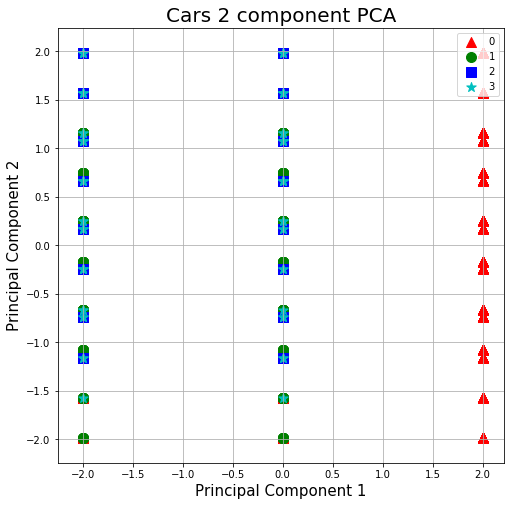

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Cars 2 component PCA', fontsize = 20)
targets = [0,1,2,3]
colors = ['r', 'g', 'b','c']
marker=['^','o','s','*']
for target, color,marker in zip(targets,colors,marker):
    indicesToKeep = finalDf['Values'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 100
              , marker=marker)
ax.legend(targets)
ax.grid()
fig.savefig('E:/Machine Learning/HW3/2PCA_CARS.png')


In [15]:
kmeans4pc=KMeans(n_clusters=4,n_init=200,max_iter=20,random_state=2)
kmeans4pc.fit(principalComponents)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=20,
    n_clusters=4, n_init=200, n_jobs=None, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [16]:
yp_k4pc=kmeans4pc.labels_

In [17]:
order=[[1,2,3,0],[1,2,0,3],[1,3,2,0],[1,3,0,2],[1,0,2,3],[1,0,3,2],[2,1,3,0],[2,1,0,3],[2,3,1,0],[2,3,0,1],[2,0,1,3],[2,0,3,1],
       [3,1,2,0],[3,1,0,2],[3,2,1,0],[3,2,0,1],[3,0,1,2],[3,0,2,1],[0,1,2,3],[0,1,3,2],[0,2,1,3],[0,2,3,1],[0,3,1,2],[0,3,2,1]]
accurate=0
finalacc=0
for k in order:
    for i in range(len(y1)):
        if yp_k4pc[i]==0 and y1[i]==k[0]:
            accurate=accurate+1/len(y1)
        elif yp_k4pc[i]==1 and y1[i]==k[1]:
            accurate=accurate+1/len(y1)
        elif yp_k4pc[i]==2 and y1[i]==k[2]:
            accurate+=1/len(y1)
        elif yp_k4pc[i]==3 and y1[i]==k[3]:
            accurate+=1/len(y1)    
    if accurate>finalacc:
        finalacc=accurate
        index2=k
    accurate=0
print(finalacc)
print(index2)

0.43807870370370694
[3, 1, 0, 2]


In [306]:
YP=pd.DataFrame(data=yp_k4pc, columns=
                        ['pre_label'])
predDf=pd.concat([principalDf,YP],axis=1)
predDf.head()

,pc1,pc2,pre_label
0,2.0,-1.986932,2
1,2.0,-1.986932,2
2,2.0,-1.986932,2
3,2.0,-1.986932,2
4,2.0,-1.986932,2


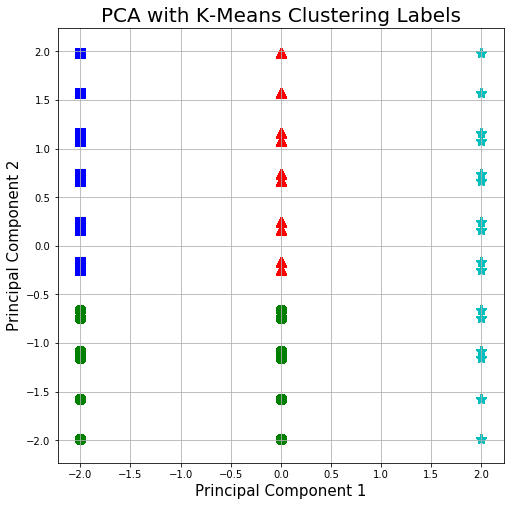

In [307]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA with K-Means Clustering Labels', fontsize = 20)
targets = [3,1,0,2]
colors = ['r','g','b','c']
marker=['^','o','s','*']
for target, color,marker in zip(targets,colors,marker):
    indicesToKeep = predDf['pre_label'] == target
    ax.scatter(predDf.loc[indicesToKeep, 'pc1']
               , predDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 100
              , marker=marker)
ax.grid()
fig.savefig('E:/Machine Learning/HW3/2PCA_kclustering_CARS.png')

In [18]:
EM_4pc=GaussianMixture(n_components=4,n_init=100,random_state=3,tol=0.0001)
EM_4pc.fit(principalComponents)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=100, precisions_init=None,
        random_state=3, reg_covar=1e-06, tol=0.0001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [19]:
yp_k4pc=EM_4pc.predict(principalComponents)
order=[[1,2,3,0],[1,2,0,3],[1,3,2,0],[1,3,0,2],[1,0,2,3],[1,0,3,2],[2,1,3,0],[2,1,0,3],[2,3,1,0],[2,3,0,1],[2,0,1,3],[2,0,3,1],
       [3,1,2,0],[3,1,0,2],[3,2,1,0],[3,2,0,1],[3,0,1,2],[3,0,2,1],[0,1,2,3],[0,1,3,2],[0,2,1,3],[0,2,3,1],[0,3,1,2],[0,3,2,1]]
accurate=0
finalacc=0
for k in order:
    for i in range(len(y1)):
        if yp_k4pc[i]==0 and y1[i]==k[0]:
            accurate=accurate+1/len(y1)
        elif yp_k4pc[i]==1 and y1[i]==k[1]:
            accurate=accurate+1/len(y1)
        elif yp_k4pc[i]==2 and y1[i]==k[2]:
            accurate+=1/len(y1)
        elif yp_k4pc[i]==3 and y1[i]==k[3]:
            accurate+=1/len(y1)    
    if accurate>finalacc:
        finalacc=accurate
        index2=k
    accurate=0
print(finalacc)
print(index2)

0.44733796296296646
[1, 3, 2, 0]


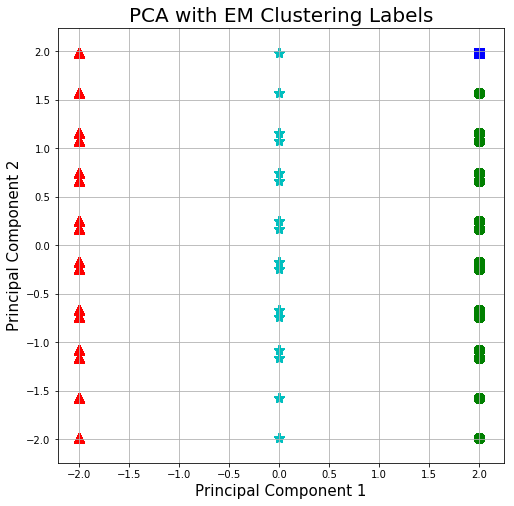

In [20]:
YP=pd.DataFrame(data=yp_k4pc, columns=
                        ['pre_label'])
predDf=pd.concat([principalDf,YP],axis=1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA with EM Clustering Labels', fontsize = 20)
targets = [1,3,2,0]
colors = ['r','g','b','c']
marker=['^','o','s','*']
for target, color,marker in zip(targets,colors,marker):
    indicesToKeep = predDf['pre_label'] == target
    ax.scatter(predDf.loc[indicesToKeep, 'pc1']
               , predDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 100
              , marker=marker)
ax.grid()
fig.savefig('E:/Machine Learning/HW3/2PCA_EMclustering_CARS.png')

In [252]:
yp_E4ic=EM_4ic.predict(ICAComponents)
order=[[1,2,3,0],[1,2,0,3],[1,3,2,0],[1,3,0,2],[1,0,2,3],[1,0,3,2],[2,1,3,0],[2,1,0,3],[2,3,1,0],[2,3,0,1],[2,0,1,3],[2,0,3,1],
       [3,1,2,0],[3,1,0,2],[3,2,1,0],[3,2,0,1],[3,0,1,2],[3,0,2,1],[0,1,2,3],[0,1,3,2],[0,2,1,3],[0,2,3,1],[0,3,1,2],[0,3,2,1]]
accurate=0
finalacc=0
for k in order:
    for i in range(len(y1)):
        if yp_E4ic[i]==0 and y1[i]==k[0]:
            accuate=accurate+1/len(y1)
        elif yp_E4ic[i]==1 and y1[i]==k[1]:
            accurate=accurate+1/len(y1)
        elif yp_E4ic[i]==2 and y1[i]==k[2]:
            accurate+=1/len(y1)
        elif yp_E4ic[i]==3 and y1[i]==k[3]:
            accurate+=1/len(y1)    
    if accurate>finalacc:
        finalacc=accurate
        index2=k
    accurate=0
print(finalacc)
print(index2)

0.4513888888888925
[2, 0, 3, 1]


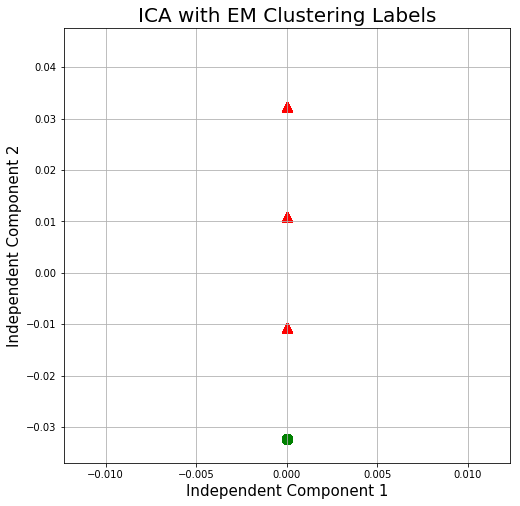

In [262]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Independent Component 1', fontsize = 15)
ax.set_ylabel('Independent Component 2', fontsize = 15)
ax.set_title('ICA with EM Clustering Labels', fontsize = 20)
targets = [2,0]
colors = ['r','g','b','c']
marker=['^','o','s','*']
for target, color,marker in zip(targets,colors,marker):
    indicesToKeep = predDf['pre_label'] == target
    ax.scatter(predDf.loc[indicesToKeep, 'Ic1']
               , predDf.loc[indicesToKeep, 'Ic2']
               , c = color
               , s = 100
              , marker=marker)
ax.grid()
fig.savefig('E:/Machine Learning/HW3/2ICA_EMclustering_CARS.png')